In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')#Reading the house price data

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


### In last column the colum AboveMedianPrice means that if the house is above the median price or not. Here 1 means yes and 0 means no.

In [6]:
#converting in the arrays so thatour machine could process
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

As we can see the our values are stored in the array now.

Now we will split our dataset into input features (X) and the feature we wish to predict (Y).


In [7]:
X = dataset[:,0:10]

Above code before comma means that we are not splitting the rows and after the comma means we are extracting the first 10 columns therefore using the '0:10' which will take the value from 0 to 9 and will put it in the variable X

In [9]:
#assigning the last column of array to Y
Y = dataset[:,10]

In [10]:
#Ensuring that scaling of our input features are similar with the help of sckit-learn
from sklearn import preprocessing

#using the function 'min-max scaler' which scales the dataset so that
#all the features lie between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
#We will now split our data into the training set and test set with the help of the sklearn
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#This tell sklearn that your_val_and_test size will be 30% of the overall dataset.

#using the same function to do the split again on val_and_test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### As we can see, We have 1022 data points while the validation and test set has 219 data points each.

#### Till now we have done following things step-wise
1. Read in the CSV file
2. Split our dataset into the input features and the label
3. Scale the data so that the input features have similar orders of the magnitude.
4. Splitting our dataset into the training set, the validation set and the test set.

# Building And Training The Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Since we want to have have follwing kind of layers in the Neural Network
1. Hidden Layer 1:32 neurons, ReLU activation
2. Hidden Layer 2:32 neurons, ReLU activation
3. Output Layer 1 neuron, Sigmoid activation

We will run the follwoing code to fulfill our requirements

In [17]:
#This says that we will store our model in the variable 'model' and we will
#describe it sequentially(layer by layer)
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

### Filling in the best numbers


In [18]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#sgd means stochastic gradient descent
#loss function for outputs that thakes the values 1 or 0 is called binary cross entropy
#metrics=accuracy means we want to track accuracy on top of the loss function

In [19]:
#By the function fit we are fitting the parameters to the data
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 449us/step - loss: 0.7020 - acc: 0.4912 - val_loss: 0.6971 - val_acc: 0.5023
Epoch 2/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.6948 - acc: 0.5068 - val_loss: 0.6903 - val_acc: 0.5662
Epoch 3/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6888 - acc: 0.5705 - val_loss: 0.6850 - val_acc: 0.6804
Epoch 4/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6838 - acc: 0.6967 - val_loss: 0.6804 - val_acc: 0.7717
Epoch 5/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6794 - acc: 0.7368 - val_loss: 0.6762 - val_acc: 0.7717
Epoch 6/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6751 - acc: 0.7417 - val_loss: 0.6721 - val_acc: 0.7717
Epoch 7/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6708 - acc: 0.7583 - val_loss: 0.6680 - val_acc: 0.7626


1022/1022 [==============================] - 0s 49us/step - loss: 0.3274 - acc: 0.8748 - val_loss: 0.3366 - val_acc: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3252 - acc: 0.8777 - val_loss: 0.3342 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3230 - acc: 0.8757 - val_loss: 0.3319 - val_acc: 0.8858
Epoch 63/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.3208 - acc: 0.8728 - val_loss: 0.3296 - val_acc: 0.8767
Epoch 64/100
1022/1022 [==============================] - ETA: 0s - loss: 0.3212 - acc: 0.906 - 0s 45us/step - loss: 0.3184 - acc: 0.8728 - val_loss: 0.3278 - val_acc: 0.8813
Epoch 65/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3172 - acc: 0.8728 - val_loss: 0.3260 - val_acc: 0.8950
Epoch 66/100
1022/1022 [==============================] - 0s 45us/step - loss: 0.3152 - acc: 0.8757 - val_loss: 0.3237 - val_acc: 0.8813
Epoch 67/100
102

In [21]:
#Evaluating on the test set
model.evaluate(X_test, Y_test)[1]#Using index 1 because the function returns the loss as the first element and the accuracy as the second element.

219/219 [==============================] - 0s 43us/step


0.8904109597206116

## Visualizing Loss And Accuracy

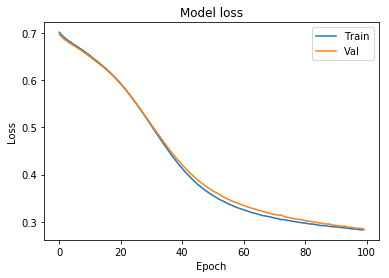

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])#plotting the loss
plt.plot(hist.history['val_loss'])#plotting the val_loss
plt.title('Model loss')#Title of the graph
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

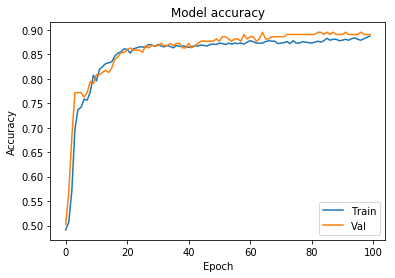

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Adding Regularization to the Neural Network



In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.4438 - acc: 0.7935 - val_loss: 0.3768 - val_acc: 0.8584
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3445 - acc: 0.8591 - val_loss: 0.3336 - val_acc: 0.8356
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2901 - acc: 0.8875 - val_loss: 0.3058 - val_acc: 0.8630
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2868 - acc: 0.8826 - val_loss: 0.3008 - val_acc: 0.8767
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2802 - acc: 0.8787 - val_loss: 0.2861 - val_acc: 0.8858
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2548 - acc: 0.8992 - val_loss: 0.2800 - val_acc: 0.8721
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2343 - acc: 0.8992 - val_loss: 0.3013 - val_acc: 0.8721
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1514 - acc: 0.9335 - val_loss: 0.4128 - val_acc: 0.8721
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1483 - acc: 0.9354 - val_loss: 0.4153 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1369 - acc: 0.9393 - val_loss: 0.4491 - val_acc: 0.8813
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1408 - acc: 0.9442 - val_loss: 0.4272 - val_acc: 0.8904
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1475 - acc: 0.9432 - val_loss: 0.5877 - val_acc: 0.8676
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1522 - acc: 0.9325 - val_loss: 0.4916 - val_acc: 0.8402
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1432 - acc: 0.9432 - val_loss: 0.4478 - val_acc: 0.8813
Epoch 68/100
1022/1022 [========================

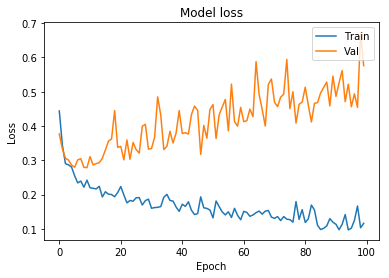

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The training loss is decreasing, but the validation loss is way above the training loss and increasing hence we can see that this is the clear sign of the over-fitting.

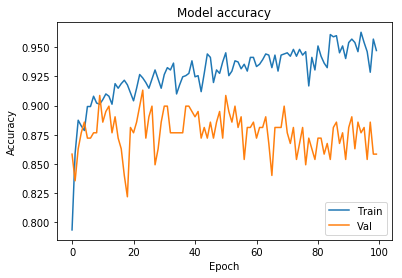

In [27]:
#plotting the accuracy code
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
#Removing over-fitting with L2 regularization and dropout
from keras.layers import Dropout
from keras import regularizers

#kernel_regularizer tells Keras to include the squared values of those parameters

#our overall loss function, and weight them by 0.01 in the loss function
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.3432 - acc: 0.6037 - val_loss: 3.9237 - val_acc: 0.8539
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6695 - acc: 0.8513 - val_loss: 0.7654 - val_acc: 0.7717
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5872 - acc: 0.8513 - val_loss: 0.5186 - val_acc: 0.8539
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5121 - acc: 0.8699 - val_loss: 0.4917 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4913 - acc: 0.8669 - val_loss: 0.5294 - val_acc: 0.8539
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4818 - acc: 0.8728 - val_loss: 0.4896 - val_acc: 0.8813
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4718 - acc: 0.8816 - val_loss: 0.4552 - val_acc: 0.8858
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4459 - acc: 0.8777 - val_loss: 0.4068 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4370 - acc: 0.8669 - val_loss: 0.4124 - val_acc: 0.8995
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4452 - acc: 0.8728 - val_loss: 0.4181 - val_acc: 0.8813
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4414 - acc: 0.8796 - val_loss: 0.4156 - val_acc: 0.8813
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4379 - acc: 0.8885 - val_loss: 0.4162 - val_acc: 0.8858
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4423 - acc: 0.8699 - val_loss: 0.4390 - val_acc: 0.8858
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4455 - acc: 0.8748 - val_loss: 0.4150 - val_acc: 0.8858
Epoch 68/100
1022/1022 [========================

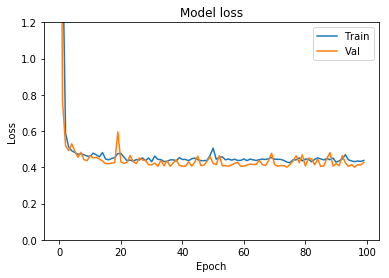

In [31]:
#Visualising validation and training loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


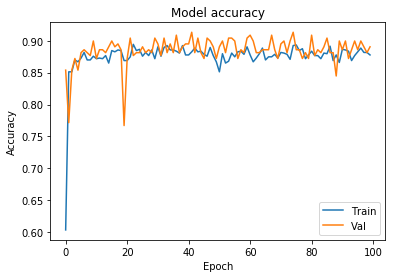

In [32]:
#Plotting the accuracy
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()